In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from wrangle import box_plot, hist_plot, wrangle_zillow
from prepare import scale_data, visualize_scaler

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

----



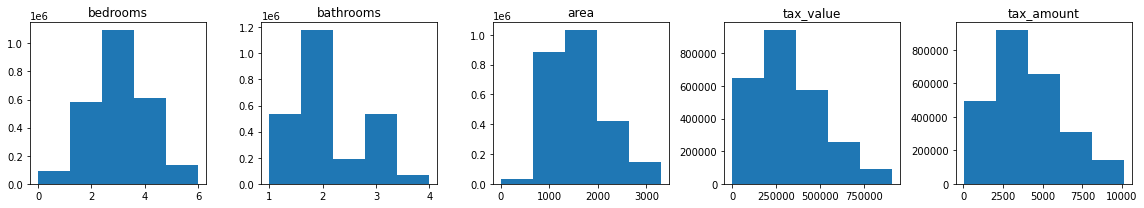

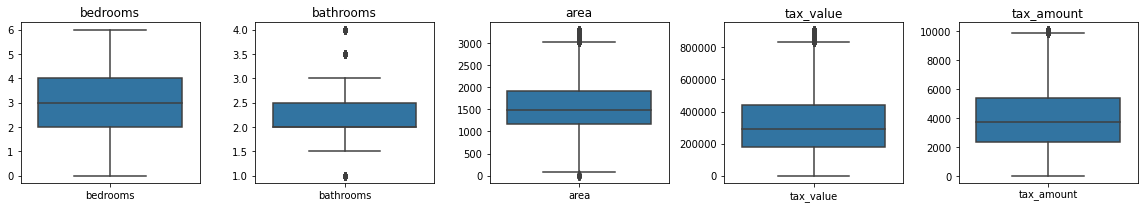

In [2]:
# First things First, let's load up the dataset, with our wrangle def
# Was going to try with substituting year like teacher did. without is saved as a .csv from previous notebook
train, validate, test = wrangle_zillow()


In [3]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
359618,2.0,2.0,1271.0,337583.0,1982.0,4145.58,6037.0
2364888,4.0,3.0,2671.0,215041.0,1964.0,2895.49,6037.0
261280,4.0,3.0,2076.0,386870.0,1939.0,4696.68,6037.0
1758266,1.0,1.0,682.0,176839.0,1974.0,2237.96,6059.0
798177,3.0,1.0,1178.0,277027.0,1950.0,3546.20,6037.0


In [6]:
# We managed it! Yay!!
train.shape, validate.shape, test.shape

((1409076, 7), (603891, 7), (503242, 7))

- Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [8]:
scaled_train = train.copy()
columns_for_scaling = ['bedrooms', 'bathrooms', 'tax_value']
# I wonder why we don't use area as well?
scaler = MinMaxScaler()
scaled_train[columns_for_scaling] = scaler.fit_transform(train[columns_for_scaling])

In [9]:
scaled_train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
359618,0.333333,0.333333,1271.0,0.370662,1982.0,4145.58,6037.0
2364888,0.666667,0.666667,2671.0,0.236104,1964.0,2895.49,6037.0
261280,0.666667,0.666667,2076.0,0.424782,1939.0,4696.68,6037.0
1758266,0.166667,0.000000,682.0,0.194155,1974.0,2237.96,6059.0
798177,0.500000,0.000000,1178.0,0.304168,1950.0,3546.20,6037.0


In [10]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
359618,2.0,2.0,1271.0,337583.0,1982.0,4145.58,6037.0
2364888,4.0,3.0,2671.0,215041.0,1964.0,2895.49,6037.0
261280,4.0,3.0,2076.0,386870.0,1939.0,4696.68,6037.0
1758266,1.0,1.0,682.0,176839.0,1974.0,2237.96,6059.0
798177,3.0,1.0,1178.0,277027.0,1950.0,3546.20,6037.0


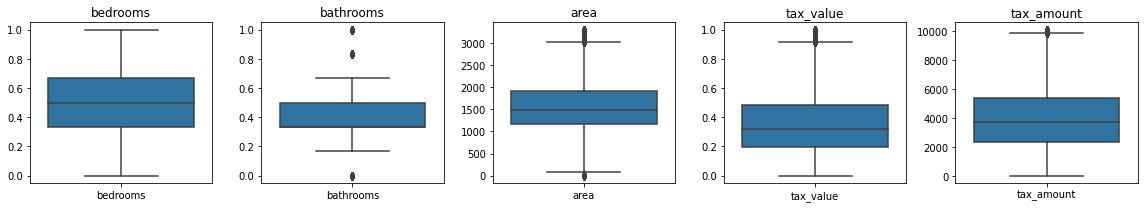

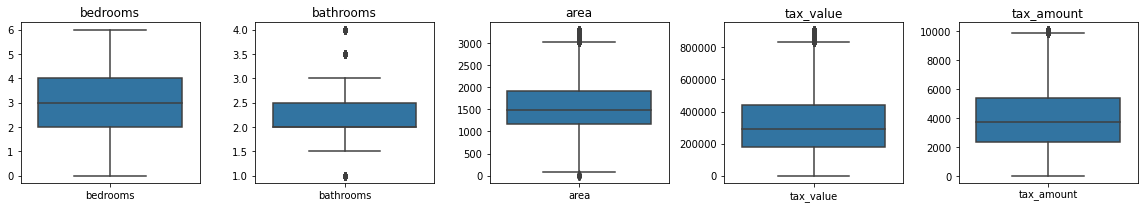

(None, None)

In [12]:
box_plot(scaled_train), box_plot(train)

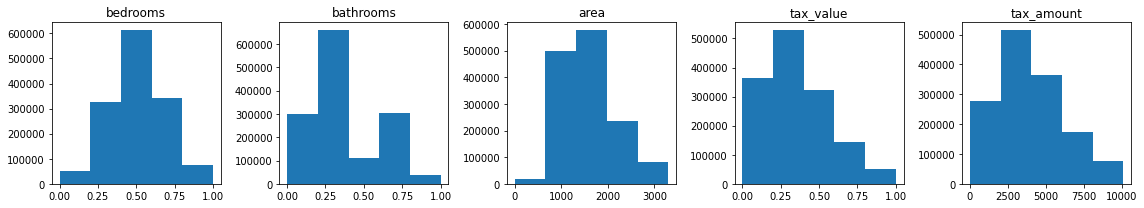

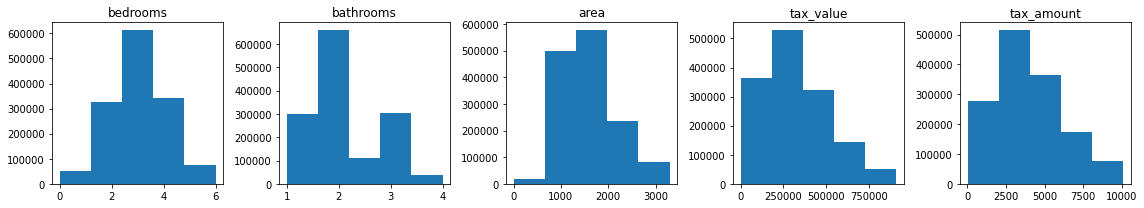

(None, None)

In [13]:
hist_plot(scaled_train), hist_plot(train)

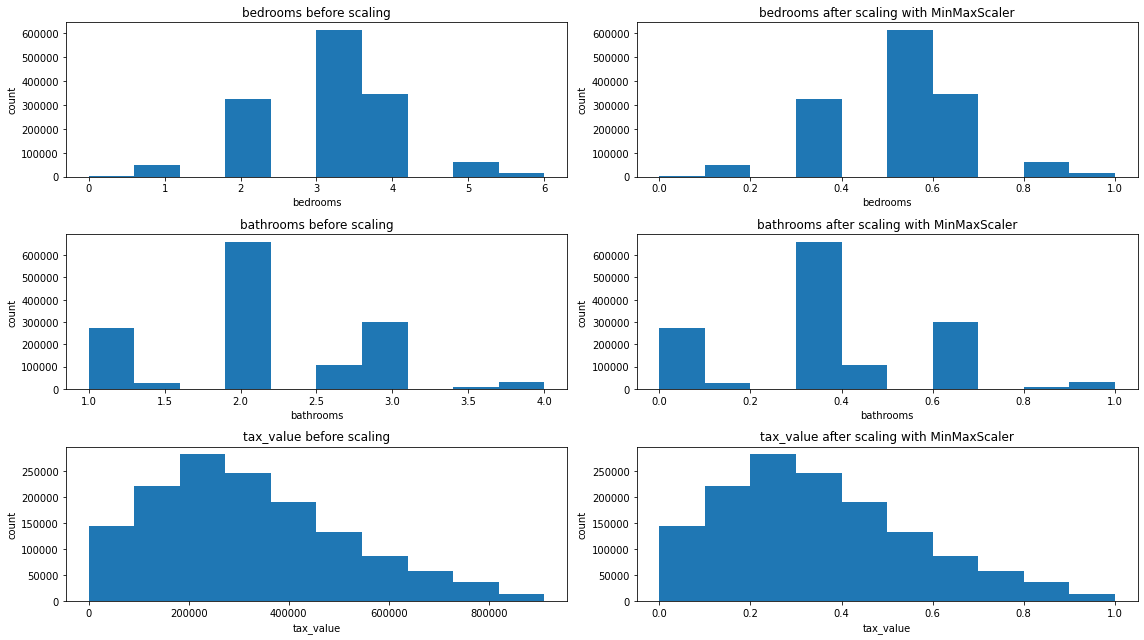

In [19]:
visualize_scaler(scaler, train)

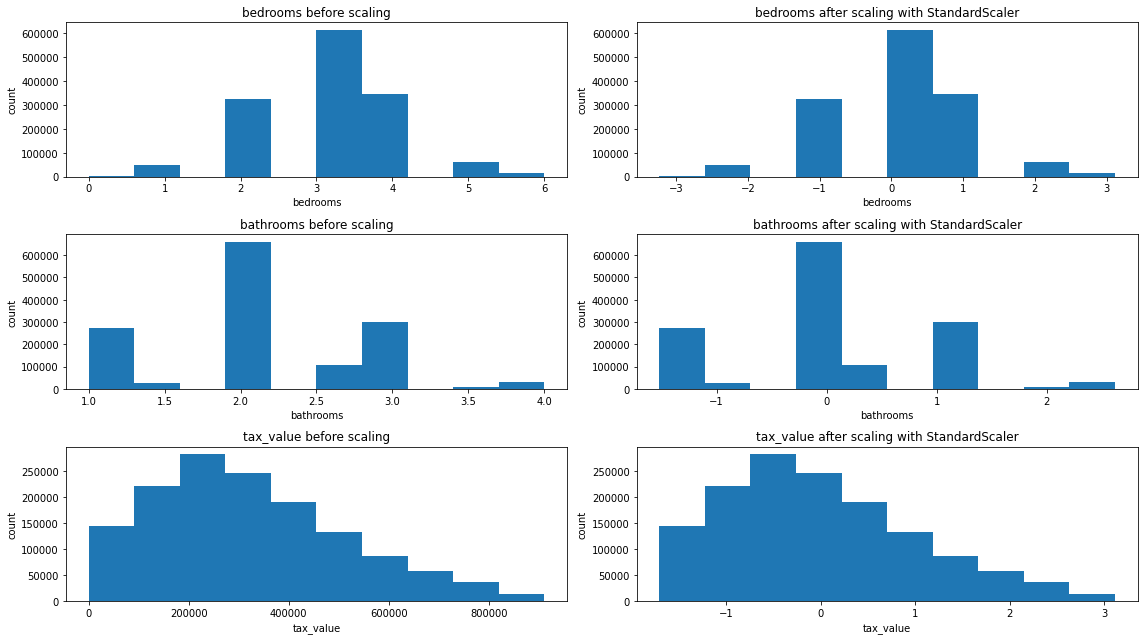

In [22]:
visualize_scaler(StandardScaler(), train)

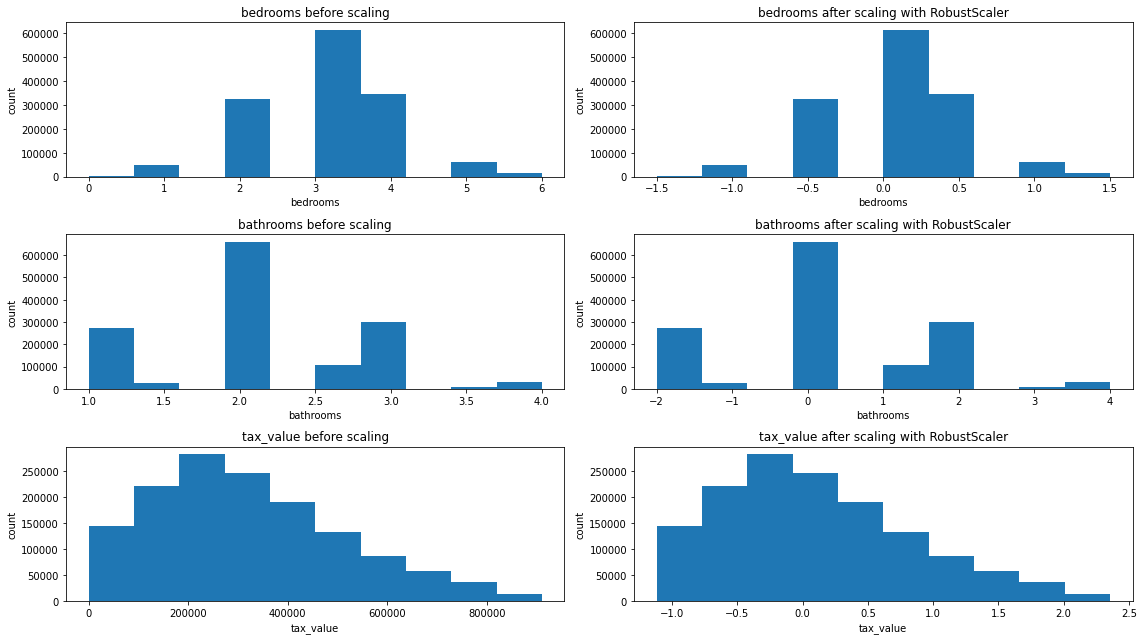

In [23]:
visualize_scaler(RobustScaler(), train)

- Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [14]:
scaler = MinMaxScaler()
original = train[['tax_value']]
scaled_data = scaler.fit_transform(original)
scaled_data[:5], original[:5]

(array([[0.37066184],
        [0.23610352],
        [0.42478187],
        [0.19415547],
        [0.30416779]]),
          tax_value
 359618    337583.0
 2364888   215041.0
 261280    386870.0
 1758266   176839.0
 798177    277027.0)

In [15]:
scaler.inverse_transform(scaled_data)[:5]

array([[337583.],
       [215041.],
       [386870.],
       [176839.],
       [277027.]])

- Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [16]:
QuantileTransformer?

Init signature:
QuantileTransformer(
    *,
    n_quantiles=1000,
    output_distribution='uniform',
    ignore_implicit_zeros=False,
    subsample=100000,
    random_state=None,
    copy=True,
)
Docstring:     
Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal
distribution. Therefore, for a given feature, this transformation tends
to spread out the most frequent values. It also reduces the impact of
(marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an
estimate of the cumulative distribution function of a feature is
used to map the original values to a uniform distribution. The obtained
values are then mapped to the desired output distribution using the
associated quantile function. Features values of new/unseen data that fall
below or above the fitted range will be mapped to the bounds of the output
distribution. Note that this tran

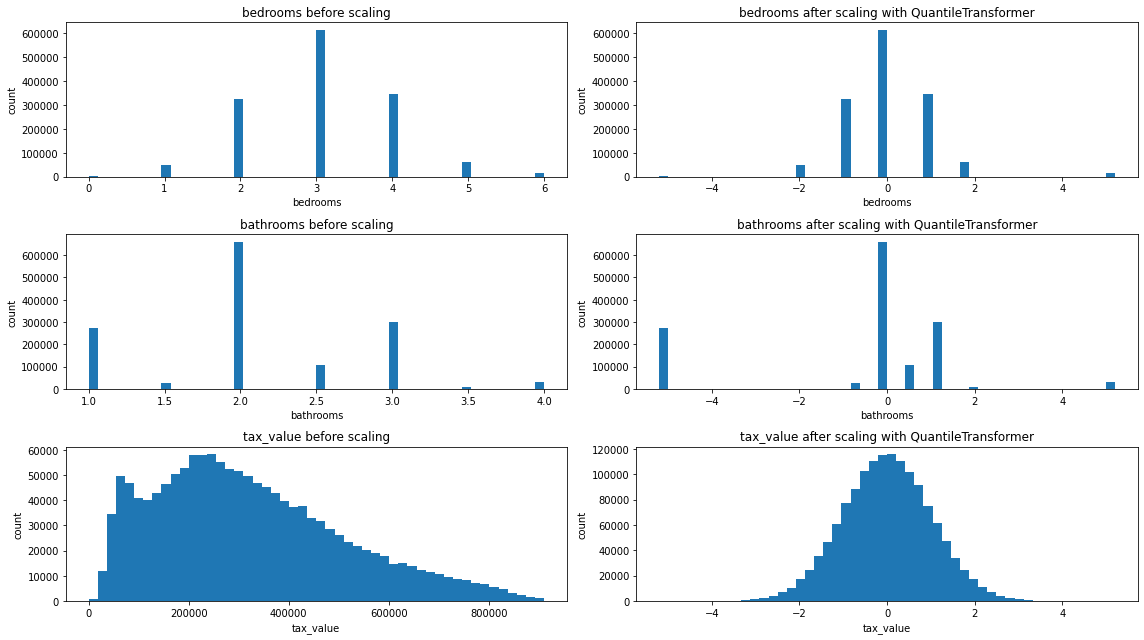

In [24]:
visualize_scaler(QuantileTransformer(output_distribution='normal'), train, bins=50)

- Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


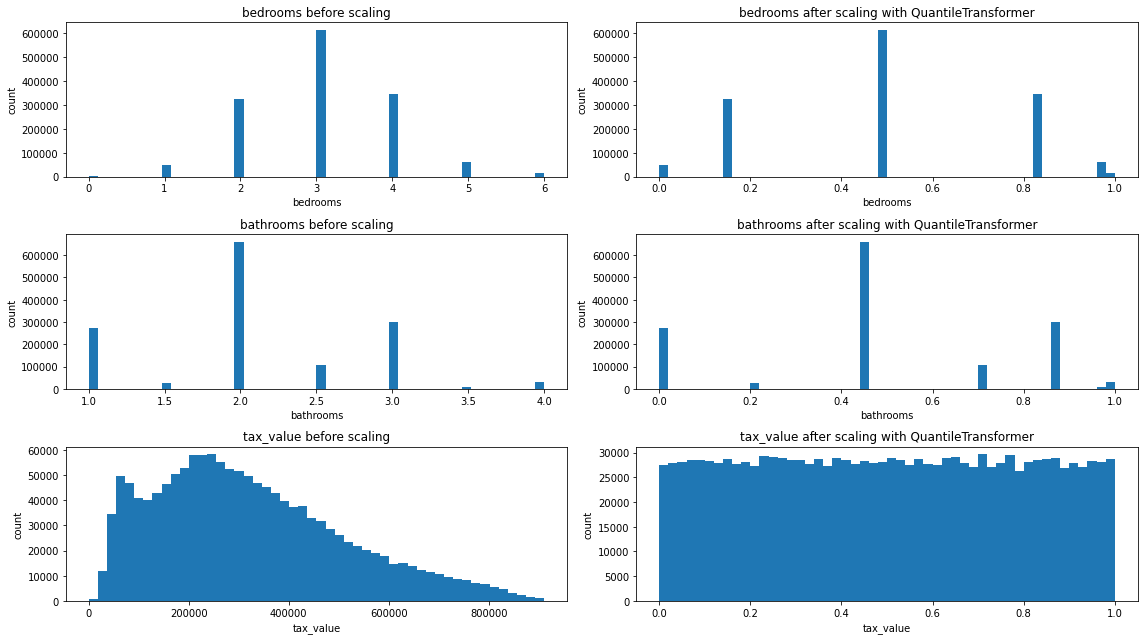

In [28]:
visualize_scaler(QuantileTransformer(), train, bins= 50)

- Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [32]:
scaled_train, scaled_validate, scaled_test = scale_data(train, validate, test, RobustScaler())

In [33]:
scaled_train.shape, scaled_validate.shape, scaled_test.shape

((1409076, 7), (603891, 7), (503242, 7))

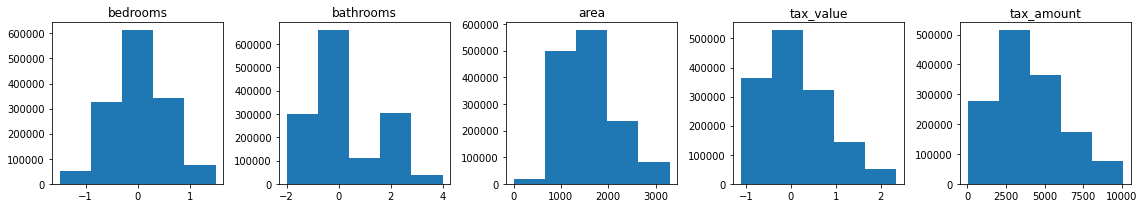

In [34]:
hist_plot(scaled_train)